## Superstore Data Analysis

Persona: Financial Analyst

The dashboard aims to address the pain points related to the superstore's financial performance and profitability. It helps identify areas of improvement and challenges by presenting various analyses on product profitability, discount impact, regional performance, and sales trends. 
By providing a comprehensive overview of the superstore's financial data, the dashboard aims to facilitate informed decision-making to enhance profitability and optimize operations

- Requirements:
    - Profitability Analysis: Users need insights into the profitability of different product categories and sub-categories to identify high-performing segments and areas that require improvement.
    - Discount Impact Analysis: Users require an understanding of how discounts affect overall profitability to optimize discounting policies and strike a balance between attracting customers and maintaining profitability.
    - Regional Performance Analysis: Users need to assess the profitability of different regions to allocate resources strategically and tailor marketing efforts to maximize profits.
    - Sales Trends Analysis: Users seek insights into sales trends over time to identify growth opportunities and address challenges during slower periods.
    - Profit Margin Analysis: Users want to evaluate the superstore's profit margin to devise strategies for improving overall profitability and staying competitive.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
orders = pd.read_excel('Sample - Superstore.xls')

In [17]:
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [19]:
#Sub-Categories with reference to Categories
for i in orders['Category'].unique():
    print(i, orders.loc[orders['Category'] == i, 'Sub-Category'].unique())

Furniture ['Bookcases' 'Chairs' 'Tables' 'Furnishings']
Office Supplies ['Labels' 'Storage' 'Art' 'Binders' 'Appliances' 'Paper' 'Envelopes'
 'Fasteners' 'Supplies']
Technology ['Phones' 'Accessories' 'Machines' 'Copiers']


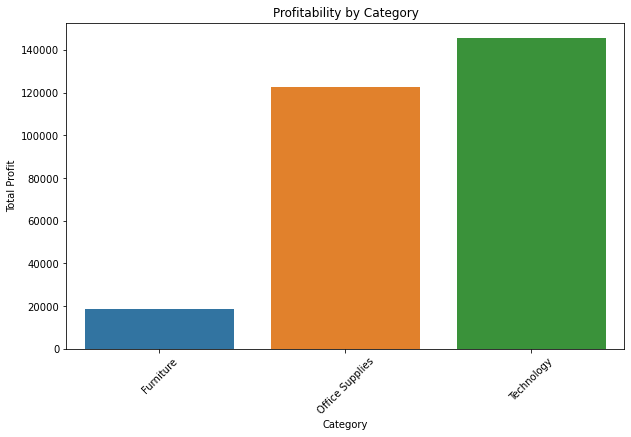

In [20]:
# Profitability Analysis by Category
category = orders.groupby('Category')['Profit'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=category.index, y=category.values)
plt.title('Profitability by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

- The profitability bar plot showcases a significant disparity in profits among different product categories. Technology and Office Supplies dominate in terms of total profits, while Furniture lags behind with considerably lower profits. Understanding the reasons behind this variance can lead to further optimization of product offerings and sales strategies.
- The Technology category's higher profitability could be attributed to its higher-priced products compared to Furniture and some Office Supplies. To improve profitability in the Furniture category, the store could explore pricing optimization or bundling strategies to increase the average order value and profit margins.
- While Technology and Office Supplies are performing well, there might still be untapped potential within these categories. Further exploration within Sub-Categories and Products would provide better insights
- Also, the store should explore opportunities to diversify its product portfolio and expand into complementary categories with growth potential. This will help spread risks and reduce reliance on a single category.

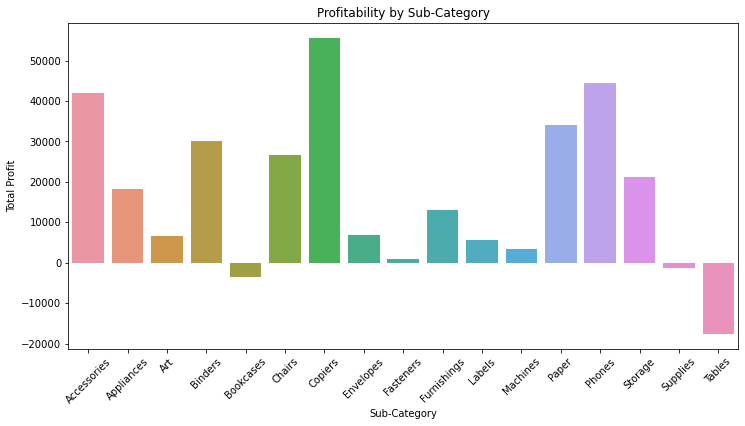

In [21]:
# Profitability Analysis by Sub-Category
subcategory = orders.groupby('Sub-Category')['Profit'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory.index, y=subcategory.values)
plt.title('Profitability by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


- Copiers and Phones emerge as the key drivers of profitability. As these sub-categories yield the highest profits, the store should prioritize resource allocation, marketing efforts, and product innovations to maintain their market dominance and capitalize on their success
- Tables and Bookcases are the sub-categories that are currently generating losses. It is essential for the superstore to conduct a detailed analysis to identify the root causes of these losses and take appropriate actions to reverse the negative trend.
- The negative profitability of Tables and Bookcases poses a risk to the store's financial health. Implementing risk mitigation strategies, such as product redesign, targeted marketing, and strategic discounting, can help these sub-categories achieve positive profitability.
- Analyzing the profit margins within each sub-category can provide valuable insights. The store can focus on optimizing pricing, reducing costs, and identifying cross-selling opportunities to enhance profitability.

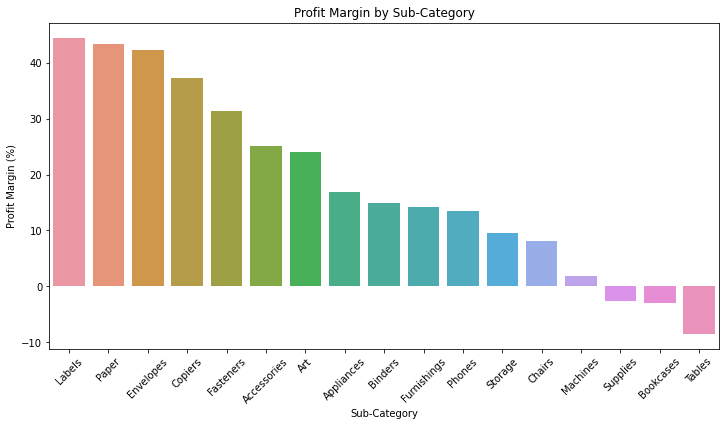

In [22]:
#Profit Margin by Sub-Category
profit = orders.groupby('Sub-Category')['Profit'].sum()
sales = orders.groupby('Sub-Category')['Sales'].sum()

profit_margin = (profit / sales) * 100

profit_margin_sorted = profit_margin.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=profit_margin_sorted.index, y=profit_margin_sorted.values)
plt.title('Profit Margin by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

- Labels, Paper, Envelopes, and Copiers are the top sub-categories with the highest profit margins. These sub-categories stand out as strong performers, contributing positively to the superstore's overall profitability.
- Supplies, Bookcases, and Tables are sub-categories experiencing losses, indicating challenges that need immediate attention to turn them into profitable segments.
- Carefully analyze the pricing strategy for each product and sub-category. Adjust prices to reflect the perceived value, considering competition, customer preferences, and market demand. Implement dynamic pricing strategies to maximize profits based on factors like demand fluctuations, seasonality, and customer behavior.

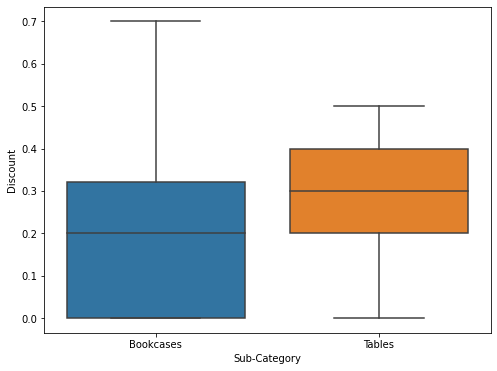

In [23]:
tb_df = orders[(orders['Sub-Category'] == 'Tables') | (orders['Sub-Category'] == 'Bookcases')]

# Discount Distribution for ,tables and bookcases
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sub-Category', y='Discount', data=tb_df)
plt.xlabel('Sub-Category')
plt.ylabel('Discount')
plt.show()

- The boxplot shows that Tables have a higher median discount, represented by the middle line of the box at 0.3. This indicates that Tables are more frequently subjected to higher discount rates compared to Bookcases, where the median discount is at 0.2
- The superstore should reevaluate its discounting policies for both Tables and Bookcases. For Tables, a thorough analysis is necessary to understand the impact of higher discount rates on profitability. Adjusting discounting strategies to optimize profitability without compromising sales is essential for both sub-categories.

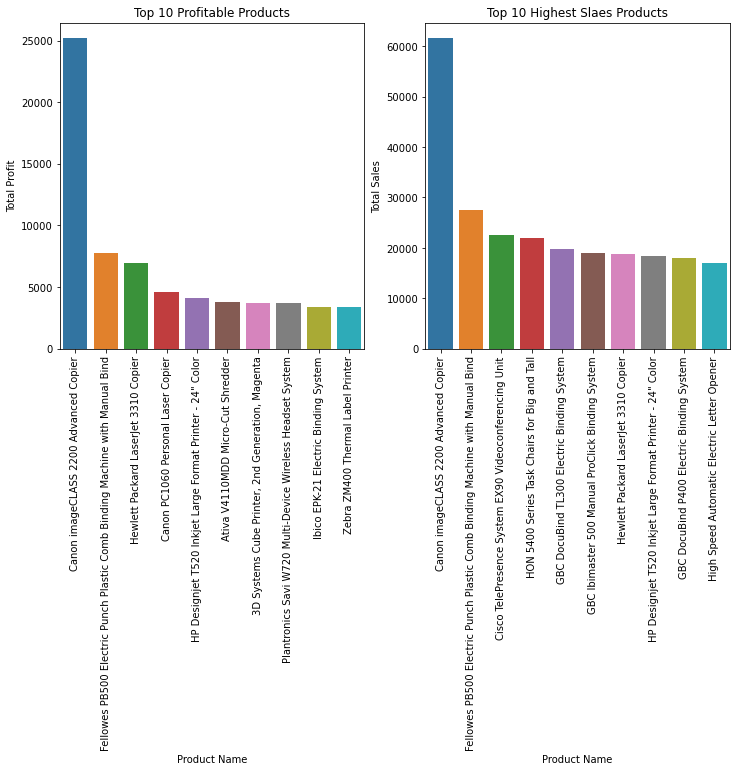

In [24]:
# Profitability and Sales Contribution by Product
profit = orders.groupby('Product Name')['Profit'].sum().nlargest(10)
sales = orders.groupby('Product Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=profit.index, y=profit.values)
plt.title('Top 10 Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=sales.index, y=sales.values)
plt.title('Top 10 Highest Slaes Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

plt.show()

- The Canon Advanced Copier emerges as the most profitable product, contributing a total profit. It outperforms all other products in terms of Sales. But it should be kept in mind that the high profit can also be due to its high price.
- While the Fellowes Binding Machine has the highest sales, it is important to note that it ranks lower in profitability compared to the Canon Advanced Copier. The store should conduct further analysis to identify the reasons behind the discrepancy between high sales and relatively lower profitability. It may be due to factors such as higher production or marketing costs, or the need for price adjustments to optimize profit margins.
- For other products on the list, the superstore should evaluate their performance based on both profitability and sales. Products with high profitability and sales are clear successes and should be maintained as top priorities. Conversely, products with low profitability despite high sales may require pricing adjustments or cost optimization measures.

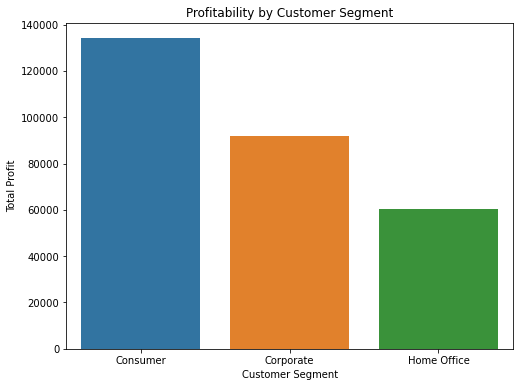

In [25]:
# Profitability Analysis by Customer Segment
segment = orders.groupby('Segment')['Profit'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=segment.index, y=segment.values)
plt.title('Profitability by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.show()

- The consumer segment's high profitability suggests that the store's products and services resonate well with individual consumers, driving significant sales and profit. The store should continue to prioritize its efforts to cater to the needs and preferences of individual customers.

- The corporate segment's relatively high profit contribution indicates that the store is successful in serving businesses and corporate clients. To further capitalize on this segment's potential, the store can develop customized solutions and offer benefits such as bulk discounts and tailored service.

In [26]:
# Profit Margin Analysis
total_profit = orders['Profit'].sum()
total_sales = orders['Sales'].sum()
profit_margin = (total_profit / total_sales) * 100
print(f'Overall Profit: ${total_profit:.2f}')
print(f'Profit Margin: {profit_margin:.2f}%')


Overall Profit: $286397.02
Profit Margin: 12.47%


- A profit margin of 12.47% indicates that the superstore is earning a reasonable profit on its sales. However, the profit margin may be considered on the lower side for a superstore, and there is room for improvement to enhance profitability
- To enhance its profit margin, the superstore should implement various strategies:
    - Firstly, it needs to optimize costs by identifying areas for reduction without compromising product quality or customer service. 
    - Secondly, pricing strategies should be evaluated to align with customer demand and maximize both sales and profit margins. 
    - Thirdly, a focus on promoting and selling high-margin products from the product mix can boost overall profitability. 
    - Tailoring marketing and sales approaches based on customer segments and offering personalized promotions to high-value customers can also be beneficial. 
    - Careful management of discount policies is crucial to avoid excessive discounts that could erode profit margins. 
    - Exploring market expansion opportunities and conducting regular profit margin analysis will allow the store to identify effective strategies and continually improve its financial performance.

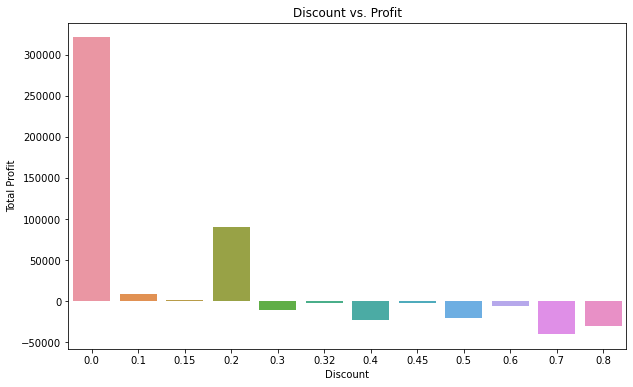

In [27]:
# Discount vs Profit Analysis
dis = orders.groupby('Discount')['Profit'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=dis.index, y=dis.values)
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Total Profit')
plt.show()

- The superstore generates the highest profit when offering no discounts (0.0 discount). This indicates that for certain products or segments, the customer may be less sensitive to price changes, and are willing to pay full price, resulting in maximum profit for the store.
- The profit impact does not follow a linear pattern with increasing discounts. There are fluctuations at certain discount levels, like at 0.2. This variation might be influenced by factors like product category, customer behavior, or competitive pricing.

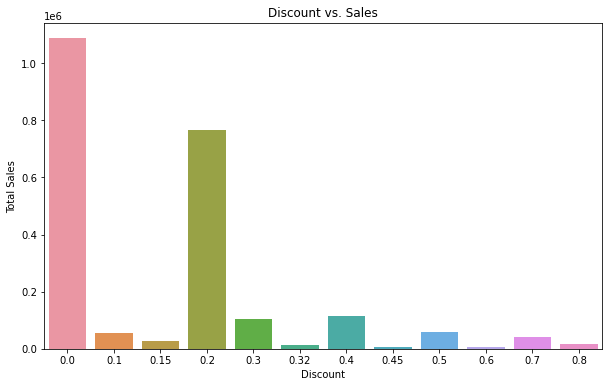

In [28]:
# Discount vs Sales Analysis
dis = orders.groupby('Discount')['Sales'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=dis.index, y=dis.values)
plt.title('Discount vs. Sales')
plt.xlabel('Discount')
plt.ylabel('Total Sales')
plt.show()

-  The barplot shows a lot of fluctuating data. Offering no discount (0.0 discount) results in the highest sales, indicating that certain products or customer segments prefer purchasing at regular prices
- Higher discounts might not be significantly increasing sales and should be carefully assessed in terms of their impact on profitability.
- The superstore should consider a data-driven approach to find the optimal discount level that strikes a balance between driving sales and maintaining a healthy profit margin. Segmenting customers and products, as well as analyzing the impact of different discount levels on sales and profit, can help in devising effective discounting strategies. 

In [29]:
# Impact of Discounts on Overall Profit
withoutd = orders[orders['Discount'] == 0]['Profit'].sum()
withd = orders['Profit'].sum()

profit_impact_percentage = ((withd - withoutd) / withoutd) * 100 

print(f'Total Profit without Discounts: ${withoutd:.2f}')
print(f'Total Profit with Discounts: ${withd:.2f}')
print(f'Profit Impact Percentage: {profit_impact_percentage:.2f}%')

Total Profit without Discounts: $320987.60
Total Profit with Discounts: $286397.02
Profit Impact Percentage: -10.78%


- The negative impact on overall profit indicates that the superstore needs to reevaluate its discounting policies and strategies. It is essential to strike a balance between attracting customers with discounts and maintaining a healthy profit margin.
- The store should conduct a thorough analysis of the discounting data to identify which discount levels and products are most negatively affecting profitability. This analysis can help the store make informed decisions on which products to discount and at what levels to optimize profit margins.
- Implementing a data-driven approach to discounting can help the store identify opportunities to increase sales while maintaining profitability. For example, focusing on high-margin products or using targeted discounts for specific customer segments can be more effective in driving revenue and profitability.
- Additionally, the superstore should consider alternative strategies for increasing sales and customer loyalty, such as loyalty programs, upselling, cross-selling, or bundling complementary products. These strategies can drive revenue without heavily relying on discounts and their potential negative impact on profitability.

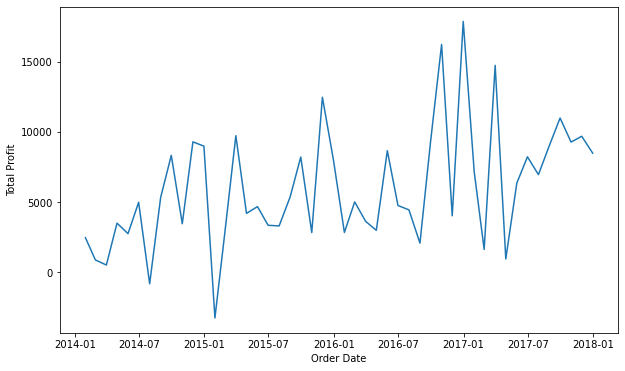

In [30]:
# Profitability over Time
orders['Order Date'] = pd.to_datetime(orders['Order Date'])
profit = orders.groupby(pd.Grouper(key='Order Date', freq='M'))['Profit'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=profit.index, y=profit.values)
plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.show()


- The high peaks in profitability around January 2017 and July 2017 indicate successful periods for the superstore, where it achieved exceptional profit growth. Understanding the factors that contributed to these peaks can provide insights into effective strategies for driving profitability.
- The gradual increase and subsequent decrease in profitability between 2016 and 2017 indicate that the store experienced fluctuations in its financial performance.
- The dip in profitability after the peak after late 2017 signifies a challenging period for the store. Analyzing the factors that led to this decline is essential for implementing corrective measures to ensure long-term profitability.

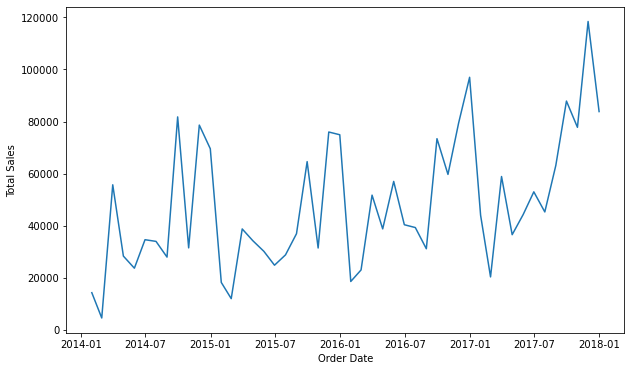

In [31]:
# Sales over Time
orders['Order Date'] = pd.to_datetime(orders['Order Date'])
profit = orders.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=profit.index, y=profit.values)
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

- The gradual increase in sales from 2017 to 2018 suggests that the superstore was successfully expanding its customer base and attracting more sales during this period.
- The high peak in January 2018 signifies a period of significant sales growth. Understanding the factors that contributed to this peak can provide insights into successful strategies that boosted sales and revenue.
- The intermittent dips in sales indicate that the superstore might face periodic challenges affecting sales performance. These challenges could be seasonal variations, economic conditions, or other factors affecting customer demand.



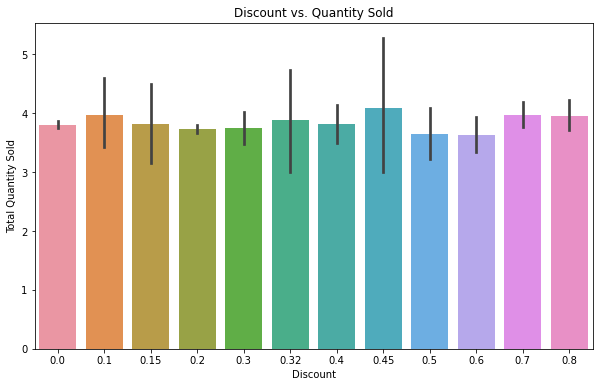

In [32]:
# Discount vs. Quantity Sold
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='Quantity', data=orders)
plt.title('Discount vs. Quantity Sold')
plt.xlabel('Discount')
plt.ylabel('Total Quantity Sold')
plt.show()

- The bar plot reveals that the superstore's discount strategy does not strongly influence the quantity of products sold. Offering higher discounts does not appear to significantly boost sales in terms of quantity

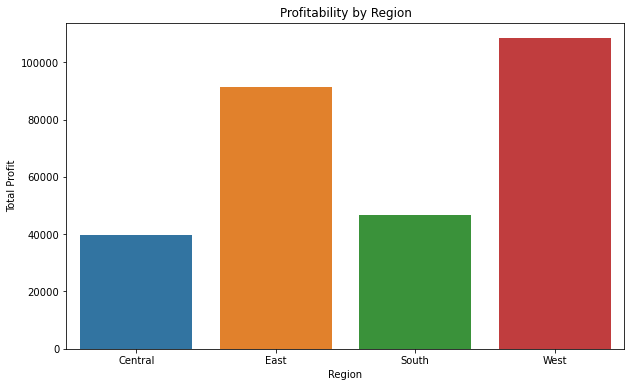

In [33]:
# Profitability Analysis by Region
region = orders.groupby('Region')['Profit'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=region.index, y=region.values)
plt.title('Profitability by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()


- The West and East regions are the major profit drivers for the superstore. These regions show a significantly higher contribution to the store's overall profitability whereas the South and Central regions, although generating profits, have lower profitability in comparison.
- Continuous monitoring and analysis of profitability by region can help the superstore make informed decisions about resource allocation and regional growth strategies. By understanding the unique dynamics of each region, the store can optimize its operations and further improve overall profitability.

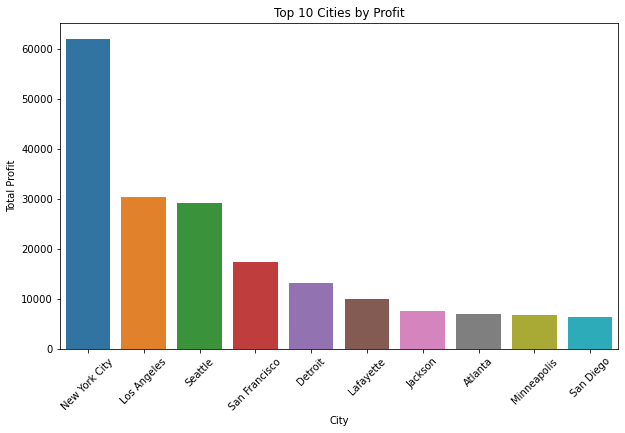

In [34]:
# Profit by City
city = orders.groupby('City')['Profit'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=city.index, y=city.values)
plt.title('Top 10 Cities by Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

- The high profitability of New York City indicates that it is the most profitable market for the superstore. 
- The superstore should invest in targeted marketing and promotional campaigns in these top-performing cities to maintain and strengthen its market presence. Understanding the specific preferences and needs of customers in each city can help the store tailor its offerings to increase customer satisfaction and loyalty.
- In contrast, the store can conduct further analyses on cities with lower profit contributions to identify potential challenges or untapped opportunities. This will assist in developing strategies to improve sales and profitability in these regions.

## Conclusion 

- Product Category and Sub-Category Analysis:
   - Technology and Office Supplies are the most profitable categories, while Furniture lags behind with lower profits.
   - Copiers and Phones are the top-performing sub-categories, while Tables and Bookcases face profitability challenges and need improvement.
   - Products like Canon Advanced Copier and Fellowes Binding Machine are top performers, but the store should assess the balance between high sales and profitability for these products.
   

- Profit Margin Analysis:
   - Labels, Paper, and Envelopes have the highest profit margins, while Supplies, Bookcases, and Tables show negative margins, requiring immediate attention.
   - The store should focus on pricing strategies, cost optimization, and product mix to enhance profit margins.
   

- Discount Analysis:
   - The impact of discounts on profit is negative, highlighting the need for more strategic discounting policies.
   - The store should analyze the relationship between discounts and quantity sold to find the optimal discount level that maximizes sales and profitability.
   

- Regional and Customer Segment Analysis:
   - The West and East regions drive higher profits, suggesting a focus on resource allocation and marketing efforts in these areas.
   - The Consumer segment contributes significantly to profitability, while Corporate customers also provide a substantial profit share.
   

- Time-based Analysis:
   - The store experienced high-profit peaks in January and July 2017, indicating successful periods of growth.
   - The store should analyze factors contributing to high-profit periods and implement strategies to sustain growth during challenging periods.
   

- Profitability and Sales by City:
   - New York City is the most profitable market, warranting targeted marketing efforts and strategies to maintain market dominance.
   - The store should explore opportunities to enhance profitability in cities with lower profit contributions through tailored marketing and improved customer engagement.
   

- Profitability by Product and Sub-Category:
   - Product pricing, cost management, and promotional strategies should be optimized to ensure higher profitability for top-performing products and sub-categories.
   

- Overall Profit Margin:
   - The current profit margin of 12.47% can be improved by implementing cost optimization, pricing strategies, and focusing on high-margin products.
   

- Summary of Actions that can be taken:

    - Product Mix Optimization: Users can prioritize resources and marketing efforts on high-profit product categories and sub-categories while addressing issues in low-profit segments.
    - Discount Strategy Refinement: Users can adjust discounting policies based on the discount impact analysis, aiming to maximize sales without compromising overall profitability.
    - Regional Resource Allocation: Users can focus on regions with higher profitability, tailoring strategies to boost sales and profitability in regions with lower performance.
    - Sales Growth Initiatives: Users can develop targeted marketing campaigns and promotions to capitalize on sales growth opportunities identified from the sales trends analysis.
    - Profit Margin Enhancement: Users can implement cost optimization measures, pricing adjustments, and product mix strategies to improve the overall profit margin and increase financial performance.
